In [1]:
# Importations nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# 1. Chargement : utiliser le fichier Mall_Customers.csv
df = pd.read_csv('Mall_Customers.csv')

# Affichage des informations de base
print("Informations sur le dataset :")
print(df.info())

# Affichage des premières lignes
print("\nPremières lignes du dataset :")
print(df.head())

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Premières lignes du dataset :
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17               

In [3]:
# 2. Nettoyage et prétraitement

# Vérification des valeurs manquantes
print("Valeurs manquantes :")
print(df.isnull().sum())

# Sélection des features quantitatives
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Standardisation des variables quantitatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Création d'un nouveau DataFrame avec les données standardisées
df_scaled = pd.DataFrame(X_scaled, columns=features)

print("\nStatistiques après standardisation :")
print(df_scaled.describe())

Valeurs manquantes :
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Statistiques après standardisation :
                Age  Annual Income (k$)  Spending Score (1-100)
count  2.000000e+02        2.000000e+02            2.000000e+02
mean  -1.021405e-16       -2.131628e-16           -1.465494e-16
std    1.002509e+00        1.002509e+00            1.002509e+00
min   -1.496335e+00       -1.738999e+00           -1.910021e+00
25%   -7.248436e-01       -7.275093e-01           -5.997931e-01
50%   -2.045351e-01        3.587926e-02           -7.764312e-03
75%    7.284319e-01        6.656748e-01            8.851316e-01
max    2.235532e+00        2.917671e+00            1.894492e+00


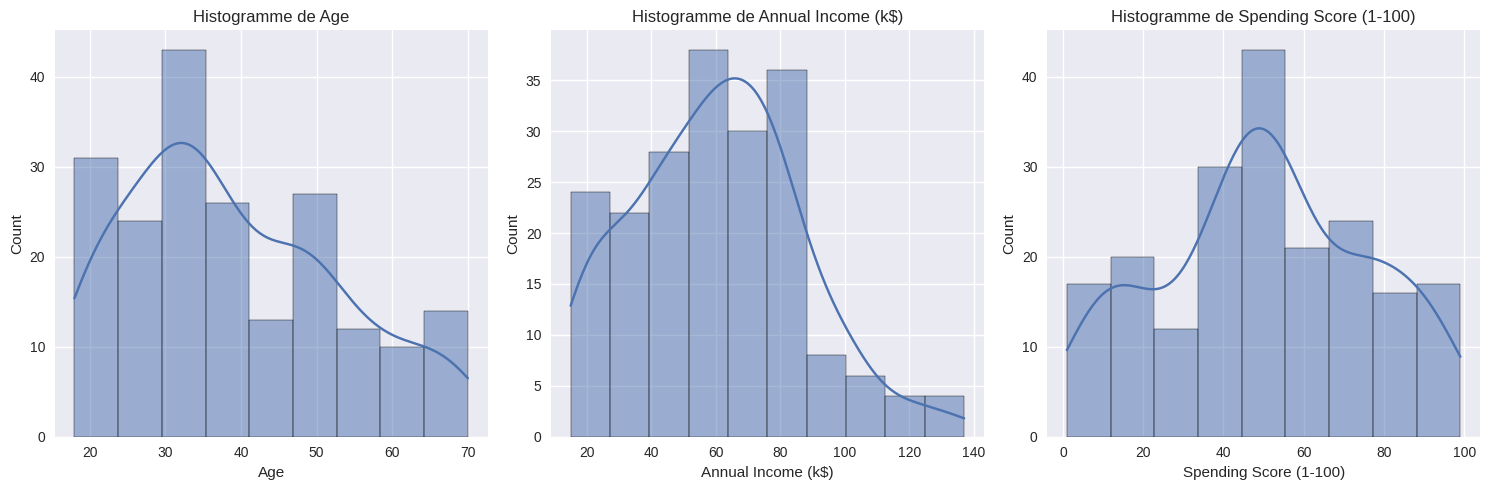

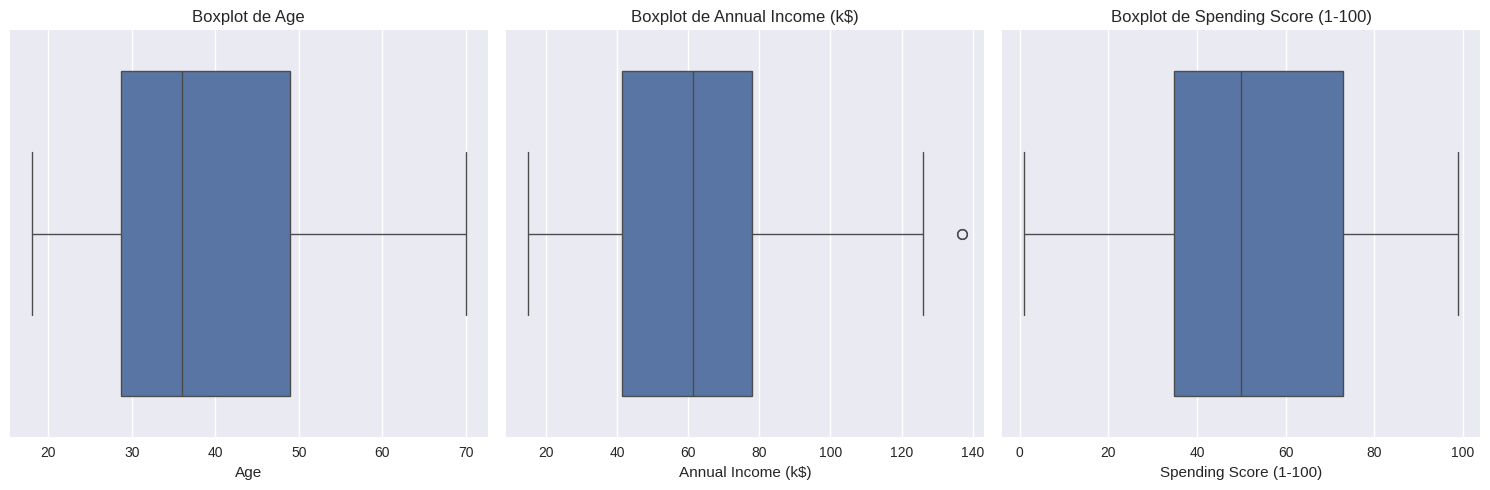

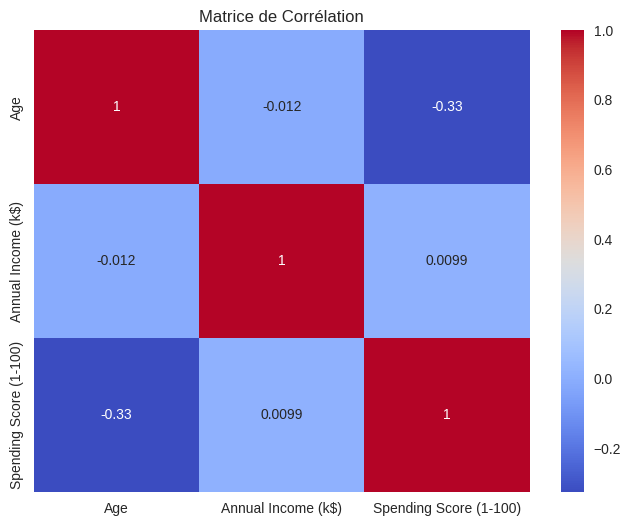

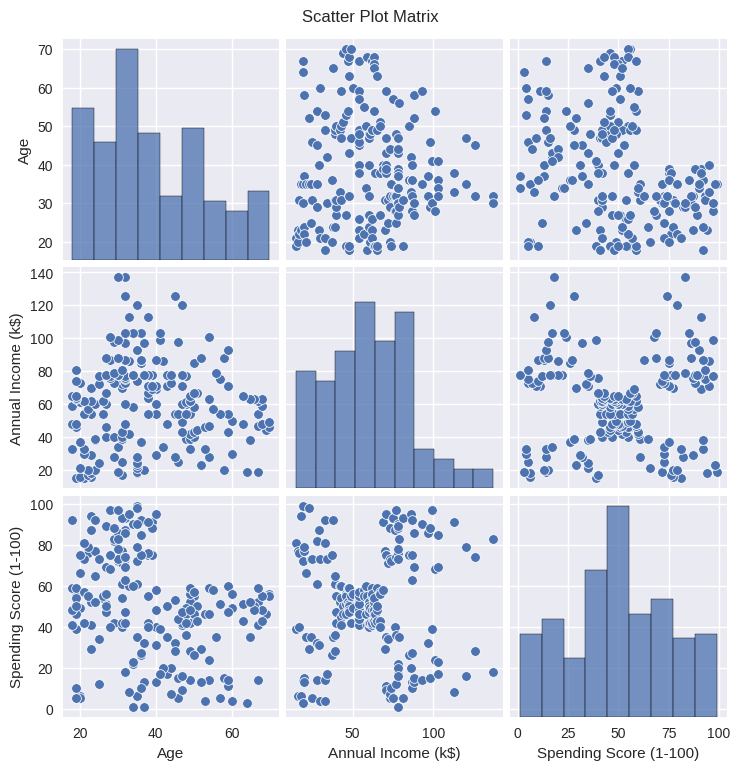

In [4]:
# 3. EDA Univariée et Multivariée

# Histogrammes
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogramme de {feature}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()
plt.show()

# Matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

# Scatter plot matrix
sns.pairplot(df[features])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

In [5]:
# 4. Feature Engineering / Sélection

# Catégorisation de l'âge
def categorize_age(age):
    if age < 20:
        return 'Très jeune'
    elif 20 <= age < 35:
        return 'Jeune'
    elif 35 <= age < 50:
        return 'Adulte'
    elif 50 <= age < 65:
        return 'Mature'
    else:
        return 'Senior'

# Ajout de la colonne de catégories d'âge
df['Age_Category'] = df['Age'].apply(categorize_age)

# Distribution des catégories d'âge
print("Répartition par catégorie d'âge :")
print(df['Age_Category'].value_counts())

# Création d'une nouvelle feature : ratio dépense/revenu
df['Spending_Income_Ratio'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']

print("\nNouvelle feature - Ratio Dépense/Revenu :")
print(df['Spending_Income_Ratio'].describe())

Répartition par catégorie d'âge :
Age_Category
Jeune         77
Adulte        66
Mature        31
Senior        14
Très jeune    12
Name: count, dtype: int64

Nouvelle feature - Ratio Dépense/Revenu :
count    200.000000
mean       1.068544
std        0.973406
min        0.012821
25%        0.632803
50%        0.887993
75%        1.130245
max        5.400000
Name: Spending_Income_Ratio, dtype: float64


Variance expliquée par les composantes principales :
[0.44266167 0.33308378]


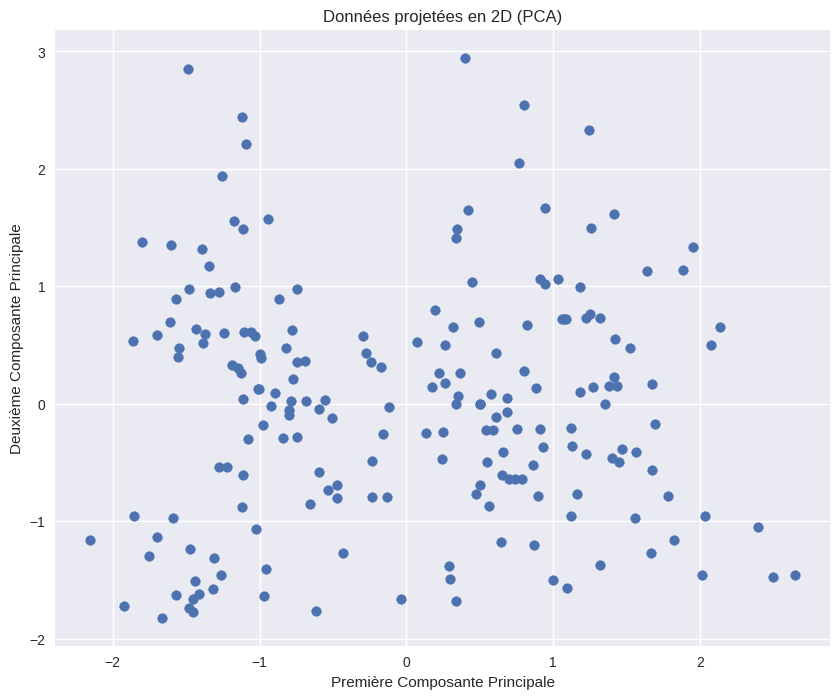

In [6]:
# 5. Réduction de dimension avec PCA

# Préparation des données pour PCA
X_scaled = StandardScaler().fit_transform(df[features])

# Application de PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée
print("Variance expliquée par les composantes principales :")
print(pca.explained_variance_ratio_)

# Visualisation en 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('Données projetées en 2D (PCA)')
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.show()

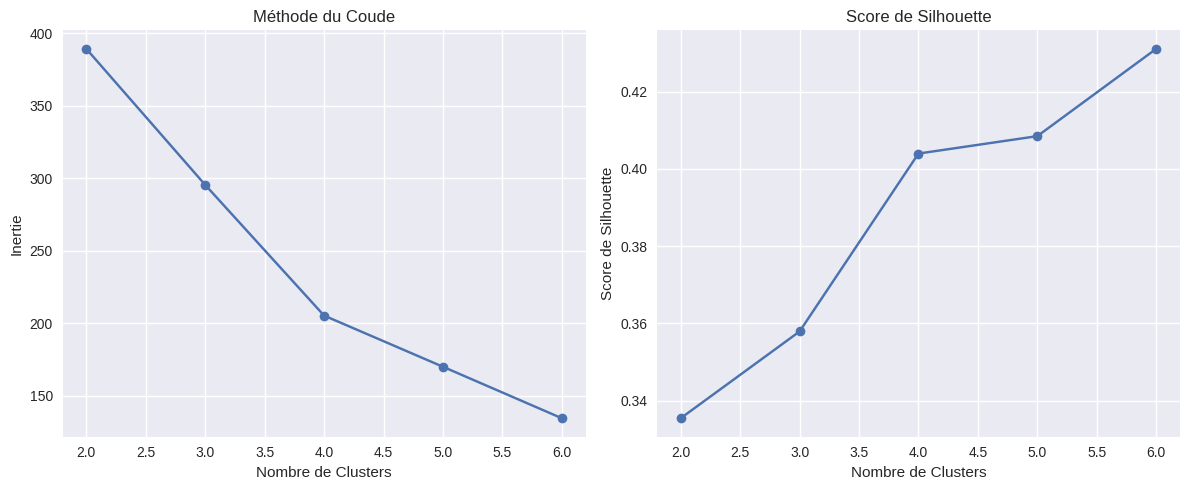

In [7]:
# 6. Clustering K-means et Évaluation de Stabilité

# Méthode du coude (Elbow Method)
inertias = []
silhouette_scores = []
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Score de Silhouette')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')

plt.tight_layout()
plt.show()

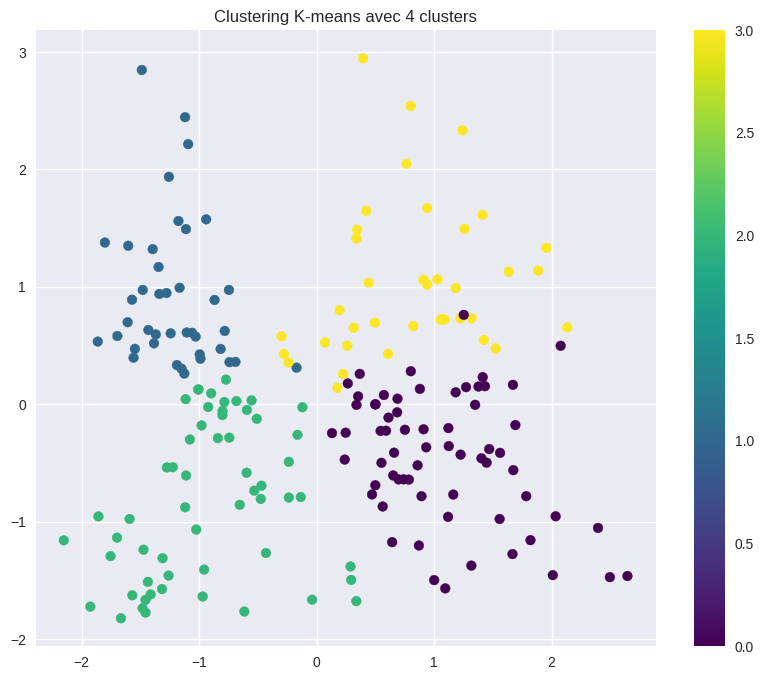

Centroïdes des clusters :
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947

Profil moyen des clusters :
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947


In [8]:
# 7. Interprétation des Clusters

# Choix du nombre de clusters (par exemple, 4)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Ajout des labels de cluster au DataFrame
df['Cluster'] = cluster_labels

# Visualisation des clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'Clustering K-means avec {n_clusters} clusters')
plt.colorbar(scatter)
plt.show()

# Analyse des centroïdes
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
centroid_df.index.name = 'Cluster'
print("Centroïdes des clusters :")
print(centroid_df)

# Profil moyen de chaque cluster
print("\nProfil moyen des clusters :")
print(df.groupby('Cluster')[features].mean())

In [9]:
# 8. Conclusions et Recommandations

# Insights sur les clusters
print("Caractéristiques des clusters :")
cluster_summary = df.groupby('Cluster')[features].agg(['mean', 'std'])
print(cluster_summary)

# Distribution par genre dans chaque cluster
print("\nRépartition par genre dans chaque cluster :")
genre_cluster = pd.crosstab(df['Cluster'], df['Gender'], normalize='index') * 100
print(genre_cluster)

# Suggestions d'amélioration
print("\nRecommandations :")
print("1. Adapter les stratégies marketing à chaque groupe de clients")
print("2. Approfondir l'analyse avec des données démographiques supplémentaires")
print("3. Considérer d'autres algorithmes de clustering pour validation")

Caractéristiques des clusters :
               Age            Annual Income (k$)             \
              mean        std               mean        std   
Cluster                                                       
0        53.984615   9.418221          47.707692  14.648723   
1        32.875000   3.857643          86.100000  16.339036   
2        25.438596   5.707193          40.000000  17.031483   
3        39.368421  10.617225          86.500000  16.761845   

        Spending Score (1-100)             
                          mean        std  
Cluster                                    
0                    39.969231  16.405953  
1                    81.525000   9.999968  
2                    60.298246  18.434212  
3                    19.578947  11.684204  

Répartition par genre dans chaque cluster :
Gender      Female       Male
Cluster                      
0        56.923077  43.076923
1        55.000000  45.000000
2        59.649123  40.350877
3        50.000000  50.